In [2]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
#plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
#from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
#sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# calssifacation report 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#warning in grid 
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.externals import joblib 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
credit = pd.read_csv('credit_train.csv')

In [77]:
credit.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Maximum Open Credit,Term_Long Term,Term_Short Term,Employment History_Junior,Employment History_Semi-Senior,Employment History_Senior,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Credit Problems_No Credit Problem,Credit Problems_Some Credit problem,Bankruptcies_No Bankruptcies,Bankruptcies_Some Bankruptcies,Credit Age_Exceptional Credit Age,Credit Age_Good Credit Age,Credit Age_Short Credit Age,Tax Liens_No Tax Lien,Tax Liens_Some Tax Liens
0,1,445412.0,709.0,1167493.0,416746.0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
1,1,262328.0,720.0,1174371.0,850784.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,1,347666.0,721.0,806949.0,386958.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
4,1,176220.0,720.0,1174371.0,427174.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
5,0,206602.0,729.0,896857.0,272448.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [4]:
credit.shape


(100514, 19)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
# Statistics for each column
credit.describe()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

In [8]:
# Missing Valuescredit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [10]:
# Drop the columns with > 50% missing
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [11]:
credit[credit['Years of Credit History'].isnull() == True]
# Here I can see that the last 514 observations are NaN values.

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
credit.drop(credit.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [13]:
# As the number of missing values is so low in the 'Maximum Open Credit' I will drop them.
for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [14]:
# As the number of missing values is so low in the 'Tax Liens' I will drop them.
for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

In [15]:
missing_values_table(credit)  

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


In [16]:

# As the number of missing values is so low in the 'Bankruptcies' I will drop them.

for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)   
  
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


In [17]:
credit['Credit Score'] = credit['Credit Score'].apply(lambda val: (val /10) if val>850 else val)
credit['Credit Score'].describe()

count    80683.000000
mean       716.278671
std         28.303132
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [18]:
print("the Min of Credit Score is " , credit['Credit Score'].min())
print("the Max of Credit Score is  " , credit['Credit Score'].max())
print ("the Median of Credit Score is ", credit['Credit Score'].median())
print ("the Mode of Credit Score is", credit['Credit Score'].mode())

the Min of Credit Score is  585.0
the Max of Credit Score is   751.0
the Median of Credit Score is  722.0
the Mode of Credit Score is 0    747.0
dtype: float64


In [19]:
# here
credit.loc[(credit['Loan Status'] =='Charged Off') & (credit['Credit Score'].isnull()),'Credit Score'] = 585
credit.loc[(credit['Loan Status'] =='Fully Paid') & (credit['Credit Score'].isnull()),'Credit Score'] = 720  
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Annual Income,19111,19.2
Years in current job,4222,4.2


In [20]:
credit['Annual Income'].describe()

count    8.068300e+04
mean     1.378339e+06
std      1.080910e+06
min      7.662700e+04
25%      8.491100e+05
50%      1.174371e+06
75%      1.650701e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [21]:

print("the Min of Annual Income is " , credit['Annual Income'].min())
print("the Max of Annual Income is  " , credit['Annual Income'].max())
print ("the Median of Annual Income is ", credit['Annual Income'].median())
print ("the Mode of Annual Income is ", credit['Annual Income'].mode())

the Min of Annual Income is  76627.0
the Max of Annual Income is   165557393.0
the Median of Annual Income is  1174371.0
the Mode of Annual Income is  0    1162572.0
dtype: float64


In [22]:
credit['Annual Income'].fillna(credit['Annual Income'].median(), inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.2


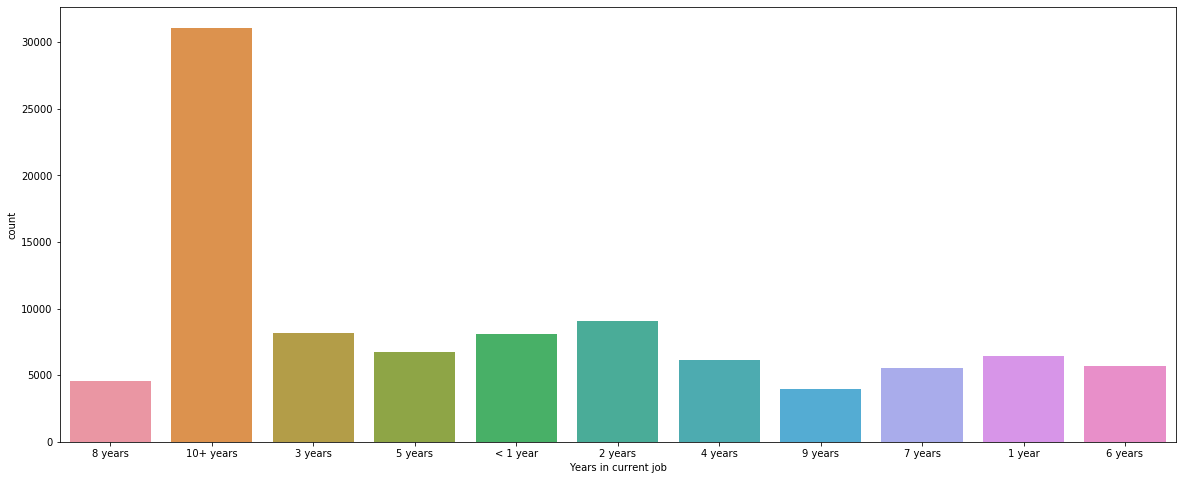

In [23]:
plt.figure(figsize=(20,8))

sns.countplot(credit['Years in current job'])

In [24]:
credit.fillna('10+ years', inplace=True) # fill with '10+ years'.
missing_values_table(credit)


Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [25]:
#convert years in current job to float 
credit['Years in current job']=credit['Years in current job'].str.extract("(\d+)")
credit['Years in current job'] = credit['Years in current job'].astype(float)

In [26]:
le = LabelEncoder()
credit['Loan Status']= le.fit_transform(credit['Loan Status'])
credit.head(10)


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,Short Term,720.0,1174371.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,Short Term,720.0,1174371.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,0,206602.0,Short Term,729.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,648714.0,Long Term,585.0,1174371.0,1.0,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
8,1,548746.0,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
9,1,215952.0,Short Term,739.0,1454735.0,1.0,Rent,Debt Consolidation,39277.75,13.9,20.0,0.0,669560.0,1021460.0,0.0,0.0


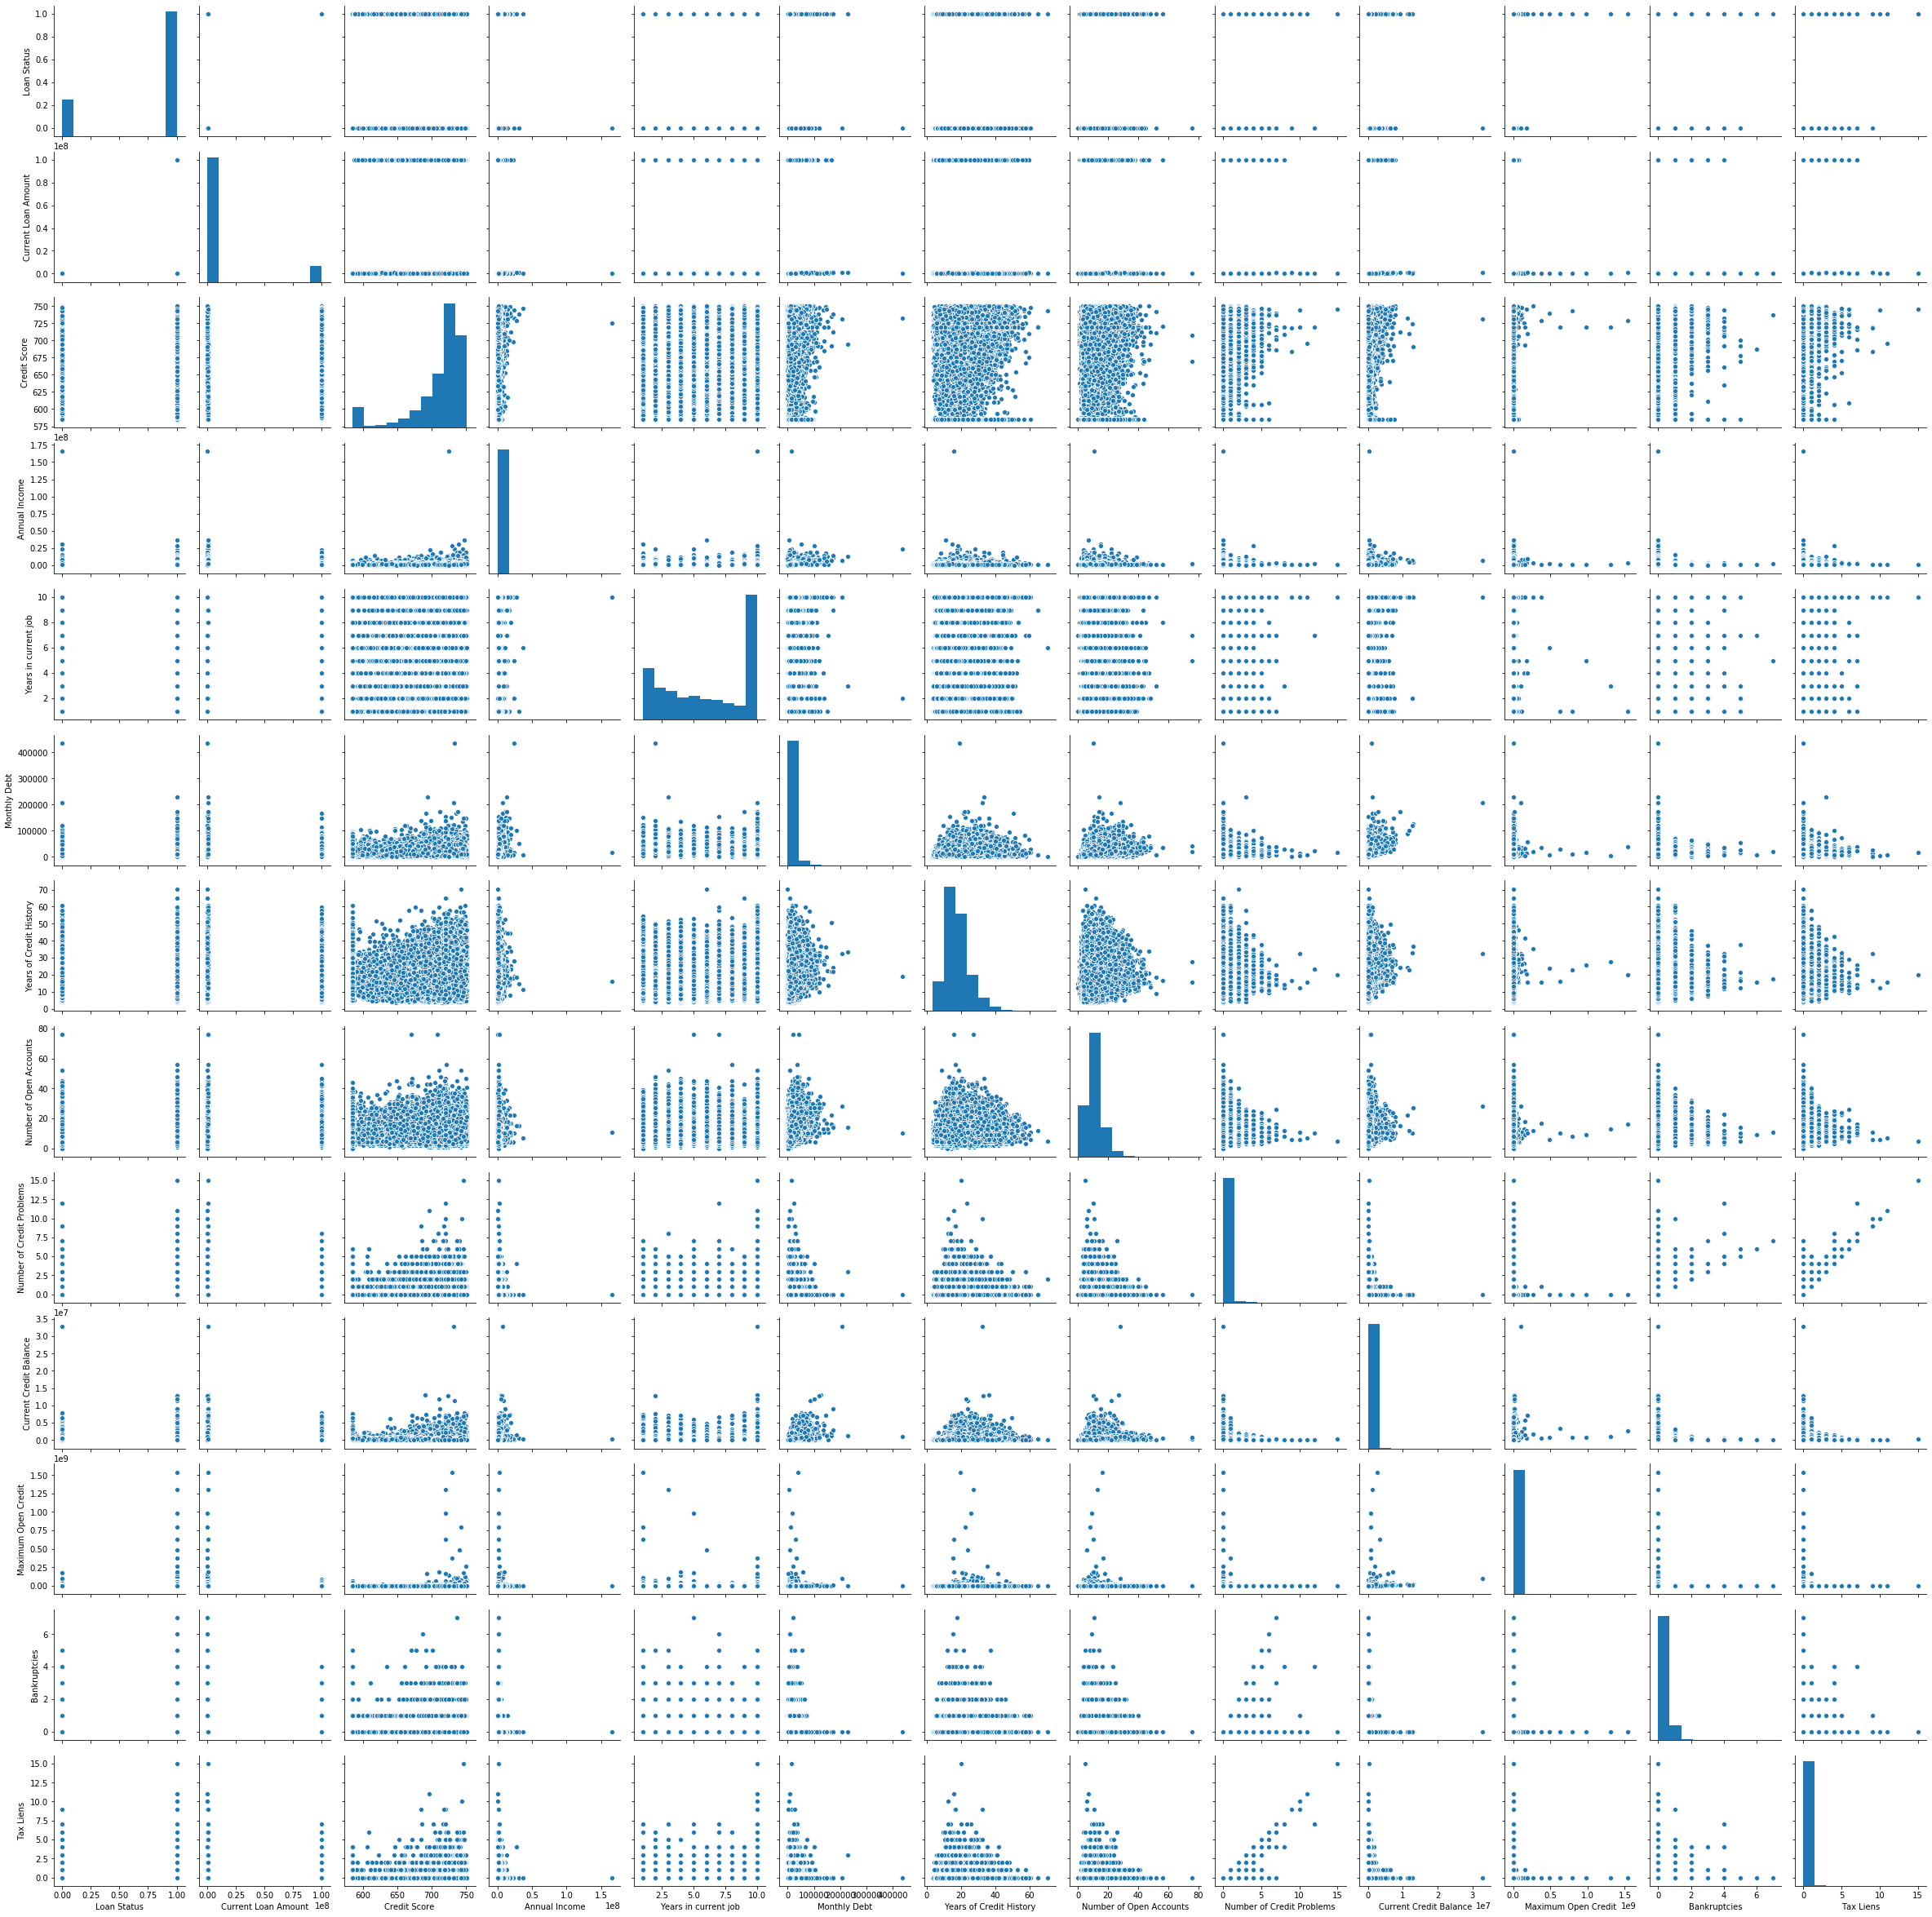

In [27]:
sns.pairplot(credit)


In [28]:
credit['Employment History'] = credit['Years in current job'].apply(lambda
x: "Junior" if x<4 else ("Semi-Senior" if x>4 and x<8 else "Senior"))

credit.drop(labels=['Years in current job'], axis=1, inplace=True)

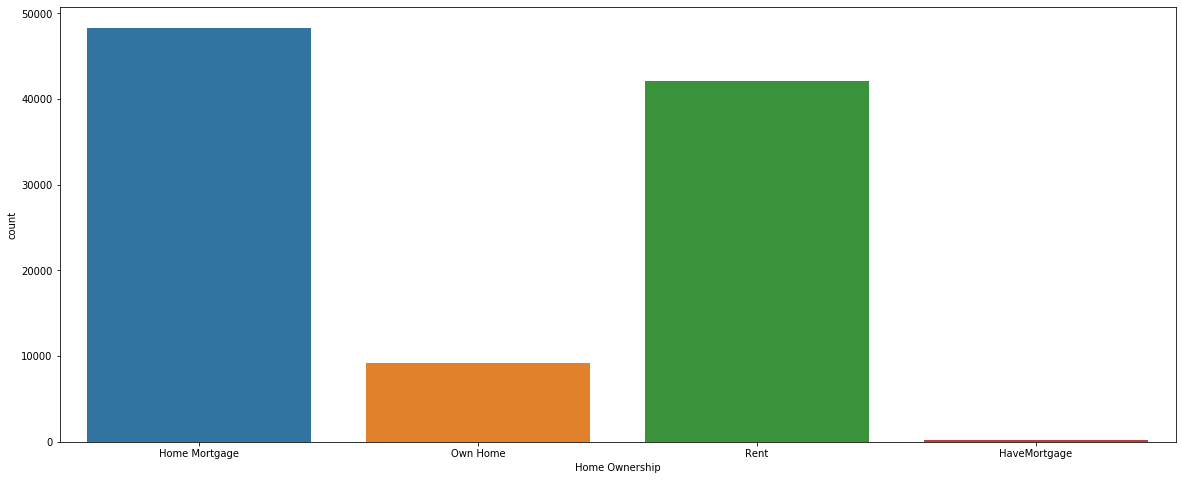

In [29]:
plt.figure(figsize=(20,8))

sns.countplot(credit['Home Ownership'])



In [30]:
credit['Home Ownership'].replace({'HaveMortgage':'Home Mortgage'},inplace=True)

In [31]:
# there are two other 
credit['Purpose'].replace({'other':'Other'},inplace=True)

In [32]:
credit['Tax Liens'] = credit['Tax Liens'].apply(lambda x: "No Tax Lien" if
x==0 else "Some Tax Liens")


In [33]:
credit['Bankruptcies'] = credit['Bankruptcies'].apply(lambda x: "No Bankruptcies" if x==0 else "Some Bankruptcies")


In [34]:
credit['Credit Problems'] = credit['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else "Some Credit problem")
credit.drop(labels=['Number of Credit Problems'], axis=1, inplace=True)

In [35]:
credit['Credit Age'] = credit['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>=5 and x<17 else
"Exceptional Credit Age"))
credit.drop(labels=['Years of Credit History'], axis=1, inplace=True)


In [36]:
#remover outlayer
for i in credit['Current Loan Amount'][credit['Current Loan Amount'] == 99999999.0 ].index:
    credit.drop(labels=i, inplace=True)

In [37]:
# this featuers will drop it 
credit.drop(labels=['Monthly Debt'], axis=1, inplace=True)
credit.drop(labels=['Current Credit Balance'], axis=1, inplace=True)
credit.drop(labels=['Number of Open Accounts'], axis=1, inplace=True)
credit.drop(labels=['Maximum Open Credit'], axis=1, inplace=True)             

In [38]:
#remover out layer
for i in credit['Annual Income'][credit['Annual Income'] >2000000].index:
     credit.drop(labels=i, inplace=True)
    

In [40]:
correlations_data = credit.corr()
# Print the correlations
print(correlations_data)

                     Loan Status  Current Loan Amount  Credit Score  \
Loan Status             1.000000            -0.059185      0.420282   
Current Loan Amount    -0.059185             1.000000     -0.154144   
Credit Score            0.420282            -0.154144      1.000000   
Annual Income           0.060442             0.402677     -0.033615   
Maximum Open Credit     0.007803             0.027999      0.008770   

                     Annual Income  Maximum Open Credit  
Loan Status               0.060442             0.007803  
Current Loan Amount       0.402677             0.027999  
Credit Score             -0.033615             0.008770  
Annual Income             1.000000             0.022530  
Maximum Open Credit       0.022530             1.000000  


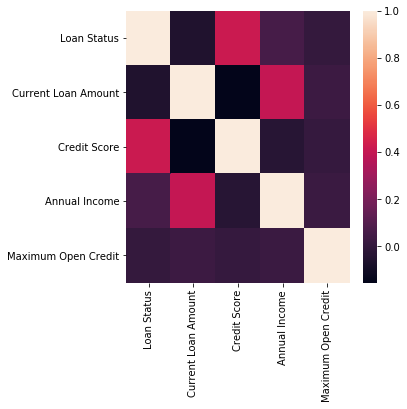

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(correlations_data)

In [42]:
# # # Feature Engineering and Selection
credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Home Ownership', 'Purpose', 'Maximum Open Credit',
       'Bankruptcies', 'Tax Liens', 'Employment History', 'Credit Problems',
       'Credit Age'],
      dtype='object')

In [43]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = credit[['Term', 'Employment History', 'Home Ownership', 'Purpose','Credit Problems','Bankruptcies','Credit Age','Tax Liens']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

credit.drop(labels=['Term', 'Employment History', 'Home Ownership', 'Purpose','Credit Problems','Bankruptcies','Credit Age','Tax Liens']
, axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [44]:
credit.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Maximum Open Credit,Term_Long Term,Term_Short Term,Employment History_Junior,Employment History_Semi-Senior,Employment History_Senior,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Credit Problems_No Credit Problem,Credit Problems_Some Credit problem,Bankruptcies_No Bankruptcies,Bankruptcies_Some Bankruptcies,Credit Age_Exceptional Credit Age,Credit Age_Good Credit Age,Credit Age_Short Credit Age,Tax Liens_No Tax Lien,Tax Liens_Some Tax Liens
0,1,445412.0,709.0,1167493.0,416746.0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
1,1,262328.0,720.0,1174371.0,850784.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,1,347666.0,721.0,806949.0,386958.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
4,1,176220.0,720.0,1174371.0,427174.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
5,0,206602.0,729.0,896857.0,272448.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [45]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62645, 36)
(15662, 36)
(62645, 1)
(15662, 1)


In [48]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
joblib.dump(sc, 'scaler.pkl') 
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

In [49]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
X_train

array([[-1.5715756 , -1.03065059, -1.55544461, ..., -0.04749585,
         0.13356656, -0.13356656],
       [ 0.14240479,  0.32320751,  0.13410515, ..., -0.04749585,
         0.13356656, -0.13356656],
       [-0.60051241,  0.37155959, -1.81004679, ..., -0.04749585,
         0.13356656, -0.13356656],
       ...,
       [-0.18872109,  0.32320751,  0.13410515, ..., -0.04749585,
         0.13356656, -0.13356656],
       [ 1.86779889, -0.69218606,  1.52161999, ..., -0.04749585,
         0.13356656, -0.13356656],
       [ 0.8608274 , -0.03943305,  2.17736147, ..., -0.04749585,
         0.13356656, -0.13356656]])

In [51]:
X_test


array([[-0.53831409,  0.17815129,  0.92656451, ..., -0.04749585,
         0.13356656, -0.13356656],
       [-0.5593461 ,  0.29903148, -1.27138476, ..., -0.04749585,
         0.13356656, -0.13356656],
       [-0.14370746, -2.94055755,  0.13410515, ..., -0.04749585,
         0.13356656, -0.13356656],
       ...,
       [-0.68002366,  1.07266468,  2.29546039, ..., -0.04749585,
         0.13356656, -0.13356656],
       [ 0.61549672,  0.32320751,  0.13410515, ..., -0.04749585,
         0.13356656, -0.13356656],
       [-0.41455868,  0.90343241, -1.29815958, ..., -0.04749585,
         0.13356656, -0.13356656]])

In [52]:
y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [53]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification


    
     

# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
   
     
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    

    return accuracies.mean()



# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_report = classification_report(y_test,model_pred)
    model_conv  = confusion_matrix(y_test,model_pred)
    model_cross = cross_val(X_train, y_train, model)
 
    print(model_report)
    print(model_conv)
    # Return the performance metric
    return model_cross
   



In [54]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='lbfgs')
logr_cross = fit_and_evaluate(logr)


print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

              precision    recall  f1-score   support

           0       0.80      0.32      0.46      4049
           1       0.80      0.97      0.88     11613

    accuracy                           0.80     15662
   macro avg       0.80      0.65      0.67     15662
weighted avg       0.80      0.80      0.77     15662

[[ 1293  2756]
 [  314 11299]]
Logistic Regression Performance on the test set: Cross Validation Score = 0.7957


In [55]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

              precision    recall  f1-score   support

           0       0.41      0.55      0.47      4049
           1       0.82      0.73      0.77     11613

    accuracy                           0.68     15662
   macro avg       0.62      0.64      0.62     15662
weighted avg       0.72      0.68      0.70     15662

[[2247 1802]
 [3177 8436]]
Naive Bayes Performance on the test set: Cross Validation Score = 0.6797


In [56]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

              precision    recall  f1-score   support

           0       0.64      0.44      0.52      4049
           1       0.82      0.91      0.87     11613

    accuracy                           0.79     15662
   macro avg       0.73      0.68      0.69     15662
weighted avg       0.78      0.79      0.78     15662

[[ 1778  2271]
 [ 1011 10602]]
Random Forest Performance on the test set: Cross Validation Score = 0.7805


In [57]:
## K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      4049
           1       0.81      0.92      0.86     11613

    accuracy                           0.78     15662
   macro avg       0.72      0.65      0.66     15662
weighted avg       0.76      0.78      0.76     15662

[[ 1500  2549]
 [  893 10720]]
KNN Performance on the test set: Cross Validation Score = 0.7707


In [58]:
# SVM
from sklearn.svm import SVC 
svc = SVC()
svc_cross = fit_and_evaluate(svc)
print('SVM Performance on the test set: Cross Validation Score = %0.4f' % svc_cross )

              precision    recall  f1-score   support

           0       0.97      0.27      0.42      4049
           1       0.80      1.00      0.89     11613

    accuracy                           0.81     15662
   macro avg       0.88      0.63      0.65     15662
weighted avg       0.84      0.81      0.77     15662

[[ 1089  2960]
 [   38 11575]]
SVM Performance on the test set: Cross Validation Score = 0.8023


In [59]:
## xgboost Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

              precision    recall  f1-score   support

           0       0.85      0.30      0.45      4049
           1       0.80      0.98      0.88     11613

    accuracy                           0.81     15662
   macro avg       0.83      0.64      0.67     15662
weighted avg       0.82      0.81      0.77     15662

[[ 1233  2816]
 [  213 11400]]
Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8028


In [60]:
# Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN'
                                           ,'Naive Bayes', 'Random Forest',
                                            'SVM','Gradiente Boosting'],
                                  'score': [logr_cross, knn_cross, naive_cross 
                                          ,random_cross, svc_cross, gb_cross]})

Text(0.5, 1.0, 'Model Comparison on Score')

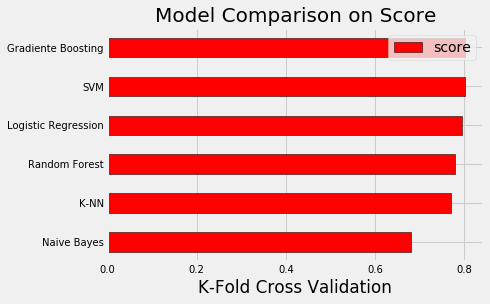

In [61]:
# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',color = 'red', edgecolor = 'black')

#Plot formatting
plt.ylabel('') 
plt.yticks(size = 10)
plt.xlabel('K-Fold Cross Validation')
plt.xticks(size = 10)
plt.title('Model Comparison on Score', size = 20)


#  Model Optimization

In [62]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)

grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 26.2min finished


[20:07:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { loss, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, loss='ls',
                                     max_delta_step=None, max_depth=5,
                                     max_features='auto', min_child_weight=None,
                                     min_samples_leaf=6...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, ..

In [64]:
results = pd.DataFrame(grid_search.cv_results_)

In [65]:
# Select the best model
final_model = grid_search.best_estimator_

final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, loss='ls', max_delta_step=0,
              max_depth=5, max_features='auto', min_child_weight=1,
              min_samples_leaf=6, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [66]:
final_model.fit(X_train, y_train)

[20:07:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { loss, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, loss='ls', max_delta_step=0,
              max_depth=5, max_features='auto', min_child_weight=1,
              min_samples_leaf=6, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [67]:
final_pred = final_model.predict(X_test)

In [68]:
cr = classification_report(final_pred,y_test)
cm = confusion_matrix(final_pred,y_test)
print(cr,cm)


              precision    recall  f1-score   support

           0       0.30      0.87      0.44      1375
           1       0.98      0.80      0.88     14287

    accuracy                           0.81     15662
   macro avg       0.64      0.84      0.66     15662
weighted avg       0.92      0.81      0.84     15662
 [[ 1200   175]
 [ 2849 11438]]


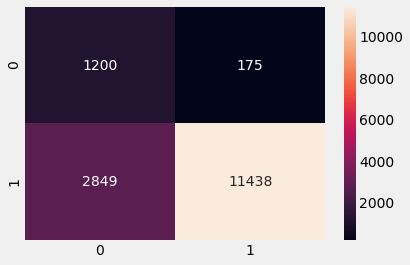

In [70]:
sns.heatmap(cm,annot=True,fmt="d")

In [71]:
# to see VIP feactuer 
model.fit(X_train, y_train)

[20:07:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { loss, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, loss='ls', max_delta_step=0,
              max_depth=5, max_features='auto', min_child_weight=1,
              min_samples_leaf=6, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [73]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results

,feature,importance
0,Credit Score,0.286892
1,Term_Long Term,0.143099
2,Annual Income,0.100847
3,Credit Age_Good Credit Age,0.031461
4,Purpose_small_business,0.030915
5,Purpose_Business Loan,0.028922
6,Bankruptcies_No Bankruptcies,0.024107
7,Home Ownership_Rent,0.023359
8,Tax Liens_No Tax Lien,0.021322
9,Current Loan Amount,0.020727


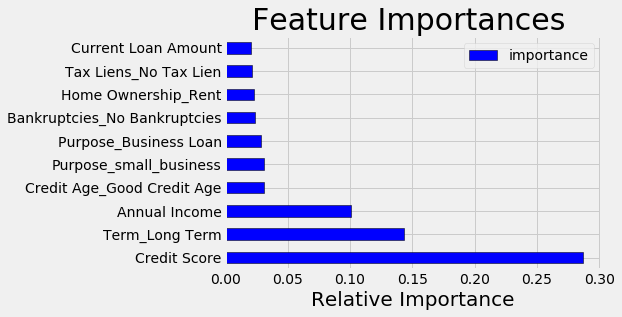

In [74]:
figsize=(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances ', size = 30);

In [75]:
import pickle
from sklearn.externals import joblib 